In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.preprocessing import StandardScaler


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

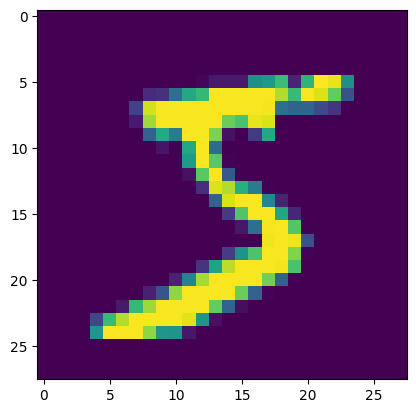

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train=X_train/255
X_test=X_test/255  ## the dataset is easier to converge if all values are similar so we divide by 255(the max no.) 
                   ## so all dataset comes between 0 and 1

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))  ## necessary to make 2d data into 1d as the input is taken 1d in the nueral networks
model.add(Dense(128,activation='relu'))  ## no need to mention input shape as the output of flatten will be given to dense
model.add(Dense(10,activation='softmax')) ## softmax used for multiclass classification

C:\Users\91637\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
28*28

784

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) ## sparse_categorical_crossentropy is 
                                                                                            ## used when multiclass classification. It does
                                                                                            ## not require one hot encoding
history=model.fit(X_train,y_train,epochs=500,validation_split=0.2,batch_size=32,callbacks=[early_stopping])

Epoch 1/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8676 - loss: 0.4710 - val_accuracy: 0.9546 - val_loss: 0.1615
Epoch 2/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9587 - loss: 0.1367 - val_accuracy: 0.9669 - val_loss: 0.1140
Epoch 3/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0900 - val_accuracy: 0.9703 - val_loss: 0.0996
Epoch 4/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9817 - loss: 0.0628 - val_accuracy: 0.9730 - val_loss: 0.0879
Epoch 5/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0453 - val_accuracy: 0.9742 - val_loss: 0.0847
Epoch 6/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9891 - loss: 0.0381 - val_accuracy: 0.9751 - val_loss: 0.0858
Epoch 7/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0279 - val_accuracy: 0.9738 - val_loss: 0.0862
Epoch 8/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9946 - loss: 0

In [12]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9769

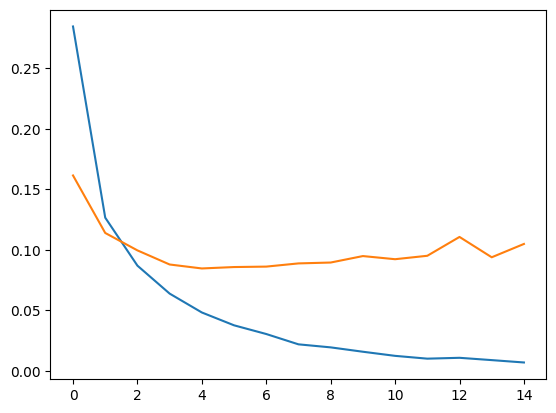

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

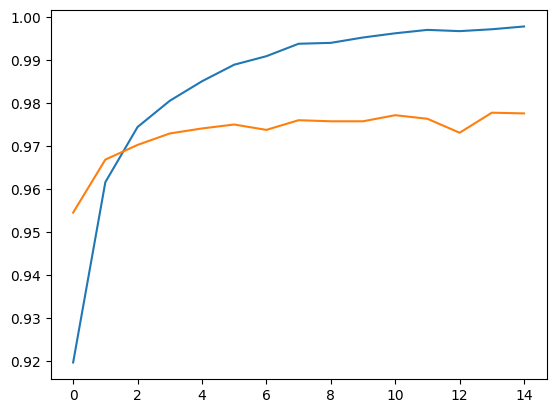

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])